<a href="https://colab.research.google.com/github/aghakishiyeva/Explainable-Deep-Learning/blob/main/AIPI590_Assignment_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Explainable Deep Learning

**Hypothesis**


**H0**: *The GoogleNet model does not show a significant difference in its ability to distinguish between "dotted," "striped," and "zigzagged" patterns when classifying images of "leopard."*<br><br>
**H1**: *The GoogleNet model shows a significant difference in its ability to recognize the "dotted" pattern as characteristic of "leopard" compared to "striped" or "zigzagged" patterns, specifically associating "dotted" patterns with "leopard" images while disregarding "striped" and "zigzagged."*

Clones the TCAV repository, navigates to the example directory, and creates a dataset with specified parameters for concept-based testing.


[![Open in? Github](https://img.shields.io/static/v1.svg?logo=github&label=Repo&message=View%20On%20Github&color=lightgrey)](https://github.com/aghakishiyeva/Explainable-Deep-Learning)

In [ ]:
import os
os.getcwd()  # Check the current directory
os.makedirs('/content/tcav', exist_ok=True)  # Create a new directory if it doesn't exist

In [ ]:
%cd /content
!git clone https://github.com/aghakishiyeva/tcav.git
%cd tcav
!ls

In [10]:
# We are going to clone the tcav repo in GitHub:
!git clone https://github.com/aghakishiyeva/tcav.git tcav
%cd tcav
!ls

shell-init: error retrieving current directory: getcwd: cannot access parent directories: No such file or directory
fatal: could not create work tree dir 'tcav': No such file or directory
[Errno 2] No such file or directory: 'tcav'
/content/tcav
shell-init: error retrieving current directory: getcwd: cannot access parent directories: No such file or directory


In [9]:
# We are going to clone the tcav repo in GitHub:
!git clone https://github.com/aghakishiyeva/tcav.git tcav
%cd tcav
!ls

# Next, we will create the datasets
%cd /content/tcav/tcav/tcav_examples/image_models/imagenet
%run download_and_make_datasets.py --source_dir=YOUR_FOLDER --number_of_images_per_folder=10 --number_of_random_folders=10

%cd /content/tcav

shell-init: error retrieving current directory: getcwd: cannot access parent directories: No such file or directory
fatal: could not create work tree dir 'tcav': No such file or directory
[Errno 2] No such file or directory: 'tcav'
/content/tcav
shell-init: error retrieving current directory: getcwd: cannot access parent directories: No such file or directory
[Errno 2] No such file or directory: '/content/tcav/tcav/tcav_examples/image_models/imagenet'
/content/tcav


Exception: File `'download_and_make_datasets.py'` not found.

Installs specific versions of TCAV and essential libraries, including `matplotlib`, `Pillow`, `scikit-learn`, `scipy`, `tensorflow`, `numpy`, `protobuf`, and `pandas` to ensure compatibility.

In [ ]:
!pip install tcav matplotlib==2.2.4 Pillow==8.2.0 scikit-learn==0.20.3 scipy==1.2.1 tensorflow==2.14.1 numpy==1.19.2 protobuf==3.10.0 pandas==1.0.3

  Using cached matplotlib-2.2.4.tar.gz (37.0 MB)
  Preparing metadata (setup.py) ... done
  Using cached Pillow-8.2.0.tar.gz (47.9 MB)
  Preparing metadata (setup.py) ... done
  Using cached scikit-learn-0.20.3.tar.gz (11.8 MB)
  Preparing metadata (setup.py) ... done
  Using cached scipy-1.2.1.tar.gz (23.1 MB)
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.3/7.3 MB 24.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  error: subprocess-exited-with-error
  
  × Preparing metadata (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (pyproject.toml) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: 

Imports essential libraries (`os`, `absl`, `random`, `matplotlib`, and `PIL`) for handling files, randomness, and plotting, alongside `tensorflow` for model operations and key TCAV modules for activation generation, concept activation vectors, and visualization.

In [ ]:
# Basic
import os
import absl
import random
import matplotlib.pyplot as plt
from PIL import Image

# Models
import tensorflow as tf

# XAI
import tcav.activation_generator as act_gen
import tcav.cav as cav
import tcav.model  as model
import tcav.tcav as tcav
import tcav.utils as utils
import tcav.utils_plot as utils_plot

Defines model, project directories, and parameters for TCAV analysis, including paths for activations, concept activation vectors (CAVs), and target images. Initializes a bottleneck layer, regularization parameter for CAVs, target class, and concepts for testing.

In [ ]:
# Model wrapper (InceptionV3 and GoogleNet are provided in model.py)
model_to_run = 'GoogleNet'
# Name of the parent directory that results are stored (if cacheing)
project_name = 'tcav_class_test'
working_dir = '/content/tcav/tcav'
# Location where activations are stored
activation_dir =  working_dir+ '/activations/'
# Location where CAVs are stored (or None if not storing)
cav_dir = working_dir + '/cavs/'
# Location of images
source_dir = '/content/tcav/tcav/tcav_examples/image_models/imagenet/YOUR_FOLDER'
# Bottleneck layer
bottlenecks = ['mixed4c']

# Create directories if they don't exist
utils.make_dir_if_not_exists(activation_dir)
utils.make_dir_if_not_exists(working_dir)
utils.make_dir_if_not_exists(cav_dir)

# Regularizer penalty parameter for linear classifier to get CAVs
alphas = [0.1]

target = 'zebra'
concepts = ["dotted","striped","zigzagged"]

Copies the `mobilenet_v2_1.0_224` folder to the main TCAV directory for easier access, then removes the original to prevent duplication.







In [ ]:
%cp -av '/content/tcav/tcav/tcav_examples/image_models/imagenet/YOUR_FOLDER/mobilenet_v2_1.0_224' '/content/tcav/tcav/mobilenet_v2_1.0_224'
%rm '/content/tcav/tcav/tcav_examples/image_models/imagenet/YOUR_FOLDER/mobilenet_v2_1.0_224'

'/content/tcav/tcav/tcav_examples/image_models/imagenet/YOUR_FOLDER/mobilenet_v2_1.0_224' -> '/content/tcav/tcav/mobilenet_v2_1.0_224'
'/content/tcav/tcav/tcav_examples/image_models/imagenet/YOUR_FOLDER/mobilenet_v2_1.0_224/mobilenet_v2_1.0_224_eval.pbtxt' -> '/content/tcav/tcav/mobilenet_v2_1.0_224/mobilenet_v2_1.0_224_eval.pbtxt'
'/content/tcav/tcav/tcav_examples/image_models/imagenet/YOUR_FOLDER/mobilenet_v2_1.0_224/mobilenet_v2_1.0_224.ckpt.data-00000-of-00001' -> '/content/tcav/tcav/mobilenet_v2_1.0_224/mobilenet_v2_1.0_224.ckpt.data-00000-of-00001'
'/content/tcav/tcav/tcav_examples/image_models/imagenet/YOUR_FOLDER/mobilenet_v2_1.0_224/mobilenet_v2_1.0_224_frozen.pb' -> '/content/tcav/tcav/mobilenet_v2_1.0_224/mobilenet_v2_1.0_224_frozen.pb'
'/content/tcav/tcav/tcav_examples/image_models/imagenet/YOUR_FOLDER/mobilenet_v2_1.0_224/mobilenet_v2_1.0_224.tflite' -> '/content/tcav/tcav/mobilenet_v2_1.0_224/mobilenet_v2_1.0_224.tflite'
'/content/tcav/tcav/tcav_examples/image_models/imag

Copies the `inception5h` folder to the main TCAV directory for streamlined access, then removes the original folder to avoid redundancy.







In [ ]:
%cp -av '/content/tcav/tcav/tcav_examples/image_models/imagenet/YOUR_FOLDER/inception5h' '/content/tcav/tcav/inception5h'
%rm '/content/tcav/tcav/tcav_examples/image_models/imagenet/YOUR_FOLDER/inception5h'

'/content/tcav/tcav/tcav_examples/image_models/imagenet/YOUR_FOLDER/inception5h' -> '/content/tcav/tcav/inception5h'
'/content/tcav/tcav/tcav_examples/image_models/imagenet/YOUR_FOLDER/inception5h/imagenet_comp_graph_label_strings.txt' -> '/content/tcav/tcav/inception5h/imagenet_comp_graph_label_strings.txt'
'/content/tcav/tcav/tcav_examples/image_models/imagenet/YOUR_FOLDER/inception5h/tensorflow_inception_graph.pb' -> '/content/tcav/tcav/inception5h/tensorflow_inception_graph.pb'
'/content/tcav/tcav/tcav_examples/image_models/imagenet/YOUR_FOLDER/inception5h/LICENSE' -> '/content/tcav/tcav/inception5h/LICENSE'
rm: cannot remove '/content/tcav/tcav/tcav_examples/image_models/imagenet/YOUR_FOLDER/inception5h': Is a directory


Defines a function to display random images from a given directory, filtering out non-image files and ensuring a sufficient number of images are available.

Sets up directories for target, concept, and random images, then uses the function to display three random images from each folder to verify dataset contents.

Images from target folder:


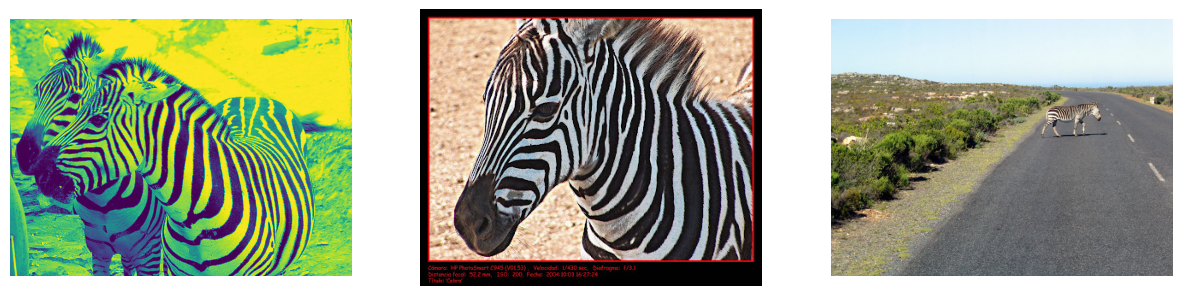

Images from dotted folder:


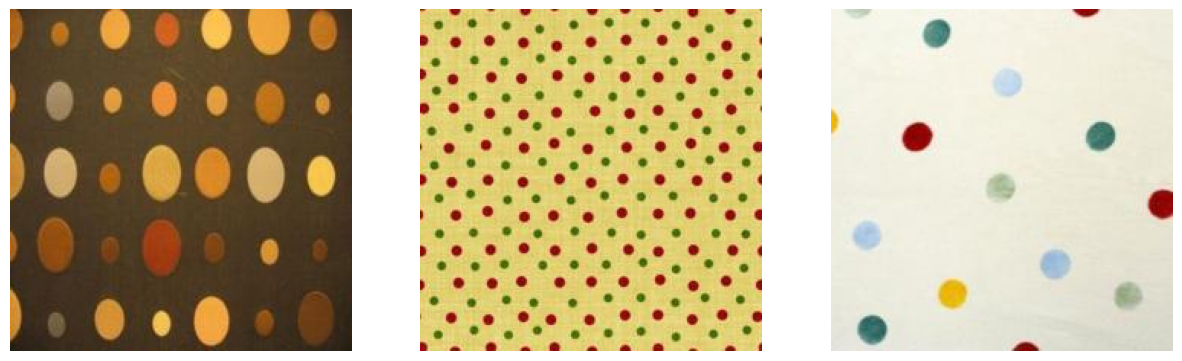

Images from striped folder:


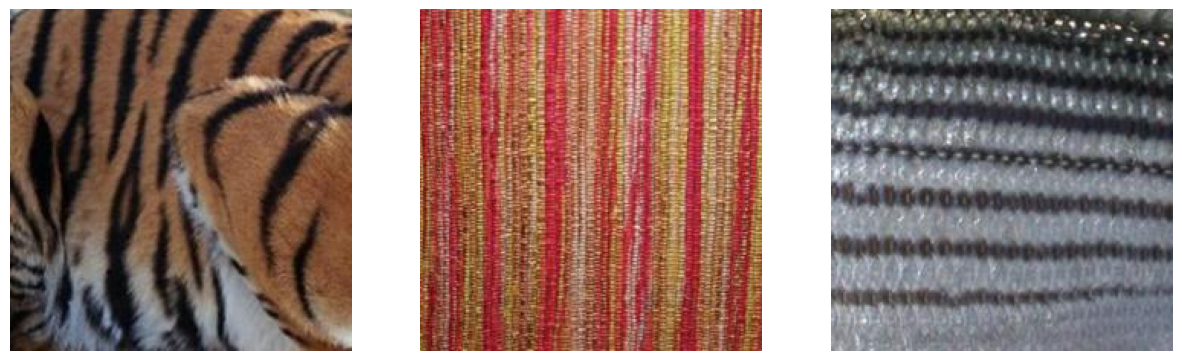

Images from zigzagged folder:


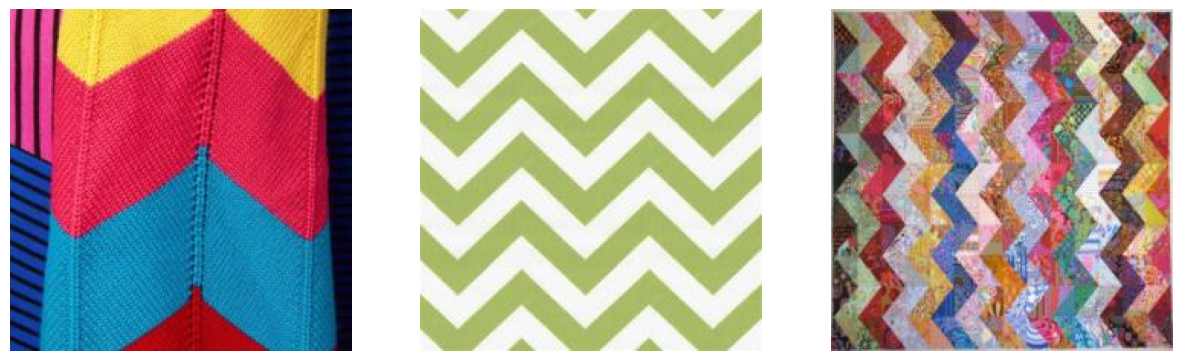

Images from random folder:


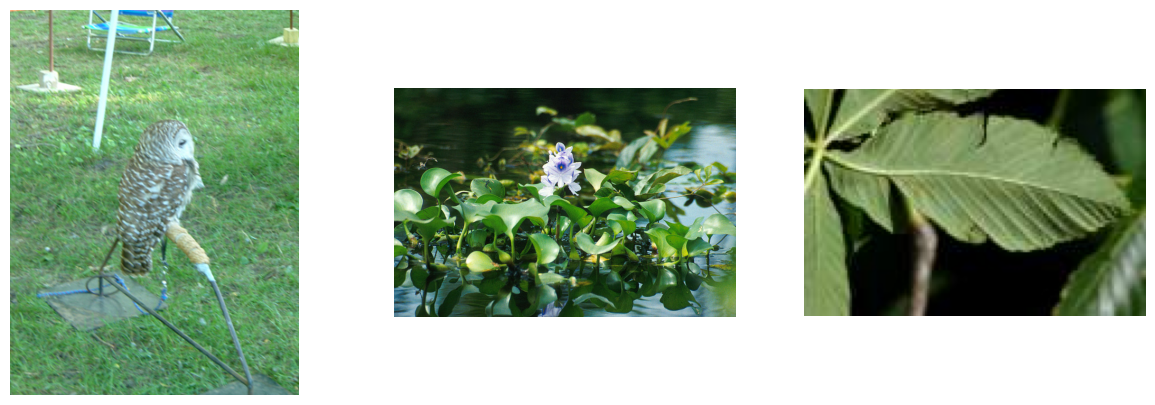

In [ ]:
def display_random_images(directory, num_images):
    # Get list of files in the directory
    files = os.listdir(directory)

    # Filter out non-image files
    image_files = [f for f in files if f.endswith('.jpg')]

    # Check if there are enough image files
    if len(image_files) < num_images:
        print(f"Not enough images in {directory}.")
        return

    # Select random images
    random_images = random.sample(image_files, num_images)

    # Display selected images
    fig, axs = plt.subplots(1, num_images, figsize=(15, 5))
    for i, image_file in enumerate(random_images):
        image_path = os.path.join(directory, image_file)
        image = Image.open(image_path)
        axs[i].imshow(image)
        axs[i].axis('off')
    plt.show()

# Define source directory
source_dir = '/content/tcav/tcav/tcav_examples/image_models/imagenet/YOUR_FOLDER'
target = 'zebra'
concepts = ["dotted","striped","zigzagged"]
random_folder = 'random500_10'

# Display 3 images from the target folder in a row
print("Images from target folder:")
display_random_images(os.path.join(source_dir, target), 3)

# Display 3 images from each concept folder
for concept in concepts:
    print(f"Images from {concept} folder:")
    display_random_images(os.path.join(source_dir, concept), 3)

# Display 3 images from a random folder
print("Images from random folder:")
display_random_images(os.path.join(source_dir, random_folder), 3)

In [ ]:
sess = utils.create_session() # a tensorflow session

GRAPH_PATH = "/content/tcav/tcav/inception5h/tensorflow_inception_graph.pb"
LABEL_PATH = "/content/tcav/tcav/inception5h/imagenet_comp_graph_label_strings.txt"

mymodel = model.GoogleNetWrapper_public(sess,
                                        GRAPH_PATH,
                                        LABEL_PATH)

In [ ]:
act_generator = act_gen.ImageActivationGenerator(mymodel, source_dir, activation_dir, max_examples=100)

In [ ]:
absl.logging.set_verbosity(0)
num_random_exp=10 # Recommend >10
mytcav = tcav.TCAV(sess,
                   target,
                   concepts,
                   bottlenecks,
                   act_generator,
                   alphas,
                   cav_dir=cav_dir,
                   num_random_exp=num_random_exp)#10)
print ('Started')
results = mytcav.run(run_parallel=False)
print ('Completed')

Started
Completed


Class = zebra
  Concept = dotted
    Bottleneck = mixed4c. TCAV Score = 0.47 (+- 0.26), random was 0.49 (+- 0.31). p-val = 0.870 (not significant)
  Concept = striped
    Bottleneck = mixed4c. TCAV Score = 0.82 (+- 0.21), random was 0.49 (+- 0.31). p-val = 0.001 (significant)
  Concept = zigzagged
    Bottleneck = mixed4c. TCAV Score = 0.79 (+- 0.10), random was 0.49 (+- 0.31). p-val = 0.003 (significant)
{'mixed4c': {'bn_vals': [0.01, 0.825, 0.7875], 'bn_stds': [0, 0.21065374432940895, 0.09762812094883318], 'significant': [False, True, True]}}


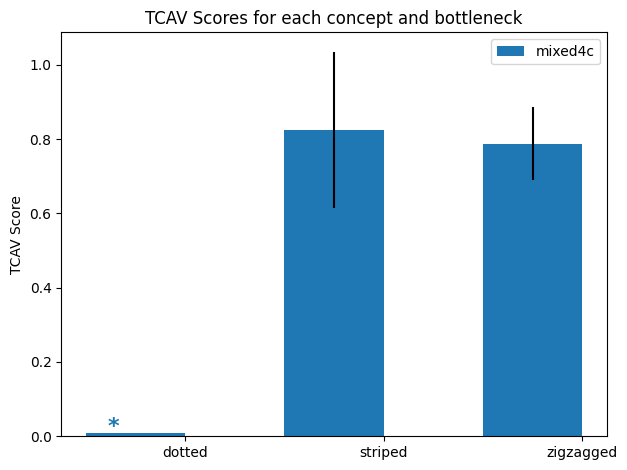

In [ ]:
utils_plot.plot_results(results, num_random_exp=num_random_exp)